### Import packages

In [1]:
import pandas as pd
import ixmp
import message_ix

from message_ix.util import make_df

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
mp = ixmp.Platform()

# 1. Show that the results of the baseline scenario do not change

## Making a clone of the existing scenario 'baseline'

In [3]:
model = "Westeros Electrified"

base = message_ix.Scenario(mp, model=model, scenario="baseline")
scen = base.clone(
    model,
    "westeros_baseline_LED",
    "adding LED technology",
    keep_solution=False,
)
scen.check_out()

In [4]:
year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")
country = "Westeros"

## Adding new technology `"LED"`

In [5]:
# add LED to the technology set
scen.add_set("technology", "LED")

### - Extract the years from cloned scenario
### - Create the base for input and output

In [6]:
year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]

# Some common values to be used for both the "input" and "output" parameters
base = dict(
    node_loc=country,
    year_vtg=vintage_years,
    year_act=act_years,
    mode="standard",
    time="year",
    unit="-",
)

# Use the message_ix utility function make_df() to create a base data frame for
# different "input" parameter values
base_input = make_df("input", **base, node_origin=country, time_origin="year")

# Create a base data frame for different "output" parameter values
base_output = make_df("output", **base, node_dest=country, time_dest="year")

### - Create input and output of `LED` technology and add them to the scenario
#### Assume `LED` to be 50% more efficient than `bulb`

In [7]:
# Extend `base_output` by filling in some of the other columns, using the
# pandas.DataFrame.assign() method
LED_out = base_output.assign(
    technology="LED", commodity="light", level="useful", value=1.5
)
scen.add_par("output", LED_out)

LED_in = base_input.assign(
    technology="LED", commodity="electricity", level="final", value=1.0
)
scen.add_par("input", LED_in)

### - Add a capacity factor of 1 for `LED`

In [8]:
df = make_df(
    "capacity_factor",
    node_loc=country,
    year_vtg=vintage_years,
    year_act=act_years,
    time="year",
    unit="-",
    technology="LED",
    value=1,
)
scen.add_par("capacity_factor", df)

### - Add the technical lifetime of `LED`
I assumed that `bulb` technology we have here is a incandescent bulb. (Lim, Kang, Ogunseitan and Schoenung, 2012) states that LED bulbs have a lifetime of 50000 hours while incandescent bulbs have 1000 hours. Similarly, (Singh, Basu, Meinhardt-Wollweber and Roth, 2015) reports that operational lifetime of LED bulbs is 30000 to 50000 hours and even more while incandescent bulbs lasts around 1000 hours. Based on these references, I assumed the LED bulb's lifetime is 50 times of the incandescent bulb's lifetime. Since we assigned a lifetime of one year for the `bulb`, I assigned a lifetime of 50 years to `LED`.

#### References
- Lim, S., Kang, D., Ogunseitan, O. and Schoenung, J., 2012. Potential Environmental Impacts from the Metals in Incandescent, Compact Fluorescent Lamp (CFL), and Light-Emitting Diode (LED) Bulbs. Environmental Science &amp; Technology, 47(2), pp.1040-1047.

- Singh, D., Basu, C., Meinhardt-Wollweber, M. and Roth, B., 2015. LEDs for energy efficient greenhouse lighting. Renewable and Sustainable Energy Reviews, 49, pp.139-147.

In [9]:
df = make_df(
    "technical_lifetime",
    node_loc=country,
    year_vtg=model_horizon,
    unit="y",
    technology="LED",
    value=50,
)
scen.add_par("technical_lifetime", df)

### - Add the investment cost of `LED`
(Suehiro and Shibata, 2011) states that retail price of the LED bulb is 2500 JPY while incandescent bulb is 100 JPY. Since I assumed LED bulb to be 50% more efficent than incandescent bulb, I calculated the investment cost of `LED` to be in the magnitude of 2500/1.5 = 1666.66 while `bulb` to be 100/1 = 100. Therefore, I assigned an investment cost of (1667/100)5 = 83.35 $/kW to `LED`.

References
- Suehiro, S. and Shibata, Y., 2011. Electricity saving potential and cost & benefit of LED lighting in Japan. IEEJ (The Institute Of Energy Economics, Japan), no. July, p.13.


In [10]:
df = make_df(
    "inv_cost",
    node_loc=country,
    year_vtg=model_horizon,
    unit="USD/kW",
    technology="LED",
    value=83.35,# in $ / kW (specific investment cost)
)
scen.add_par("inv_cost", df)

In [11]:
mp.scenario_list()

,model,scenario,scheme,is_default,is_locked,cre_user,cre_date,upd_user,upd_date,lock_user,lock_date,annotation,version
0,Westeros Electrified,baseline,MESSAGE,1,0,koek,2022-06-11 18:10:47.573000,koek,2022-06-11 18:12:47.287000,None,None,basic model of Westeros electrification,2
1,Westeros Electrified,carbon_bound_by_year,MESSAGE,1,0,koek,2022-06-12 16:19:53.392000,koek,2022-06-12 16:19:55.681000,None,None,clone Scenario from 'Westeros Electrified|base...,1
2,Westeros Electrified,carbon_tax,MESSAGE,1,0,koek,2022-06-12 16:19:55.951000,koek,2022-06-12 16:19:57.714000,None,None,clone Scenario from 'Westeros Electrified|base...,1
3,Westeros Electrified,emission_bound,MESSAGE,1,0,koek,2022-06-11 21:02:27.995000,koek,2022-06-11 21:02:29.601000,None,None,clone Scenario from 'Westeros Electrified|base...,2
4,Westeros Electrified,westeros_baseline_LED,MESSAGE,1,0,koek,2022-06-12 16:37:45.749000,koek,2022-06-12 16:39:38.005000,None,None,clone Scenario from 'Westeros Electrified|base...,29
5,Westeros Electrified,westeros_baseline_LED_carbonprice,MESSAGE,1,1,koek,2022-06-12 14:51:07.382000,None,None,koek,2022-06-12 14:51:07.804000,clone Scenario from 'Westeros Electrified|west...,1
6,Westeros Electrified,westeros_baseline_LED_search,MESSAGE,1,0,koek,2022-06-12 14:07:15.364000,koek,2022-06-12 14:07:35.675000,None,None,clone Scenario from 'Westeros Electrified|west...,3


## Add Historical Activity of `LED` as Zero

In [12]:
history = [690]
df = make_df(
        "historical_activity",
        node_loc=country,
        year_act=history,
        mode="standard",
        time="year",
        unit="GWa",
        technology="LED",
        value=0,
    )
scen.add_par("historical_activity", df)

# Solve the Model

In [13]:
scen.commit(comment="Introducing LED technology")
scen.set_as_default()

In [14]:
mp.scenario_list()

,model,scenario,scheme,is_default,is_locked,cre_user,cre_date,upd_user,upd_date,lock_user,lock_date,annotation,version
0,Westeros Electrified,baseline,MESSAGE,1,0,koek,2022-06-11 18:10:47.573000,koek,2022-06-11 18:12:47.287000,None,None,basic model of Westeros electrification,2
1,Westeros Electrified,carbon_bound_by_year,MESSAGE,1,0,koek,2022-06-12 16:19:53.392000,koek,2022-06-12 16:19:55.681000,None,None,clone Scenario from 'Westeros Electrified|base...,1
2,Westeros Electrified,carbon_tax,MESSAGE,1,0,koek,2022-06-12 16:19:55.951000,koek,2022-06-12 16:19:57.714000,None,None,clone Scenario from 'Westeros Electrified|base...,1
3,Westeros Electrified,emission_bound,MESSAGE,1,0,koek,2022-06-11 21:02:27.995000,koek,2022-06-11 21:02:29.601000,None,None,clone Scenario from 'Westeros Electrified|base...,2
4,Westeros Electrified,westeros_baseline_LED,MESSAGE,1,0,koek,2022-06-12 19:52:41.733000,None,None,None,None,clone Scenario from 'Westeros Electrified|base...,30
5,Westeros Electrified,westeros_baseline_LED_carbonprice,MESSAGE,1,1,koek,2022-06-12 14:51:07.382000,None,None,koek,2022-06-12 14:51:07.804000,clone Scenario from 'Westeros Electrified|west...,1
6,Westeros Electrified,westeros_baseline_LED_search,MESSAGE,1,0,koek,2022-06-12 14:07:15.364000,koek,2022-06-12 14:07:35.675000,None,None,clone Scenario from 'Westeros Electrified|west...,3


In [15]:
scen.solve()

In [16]:
scen.var("OBJ")["lvl"]

108791.28125

# Plot the Results

In [17]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

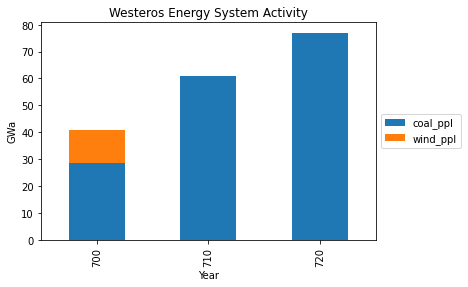

In [18]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

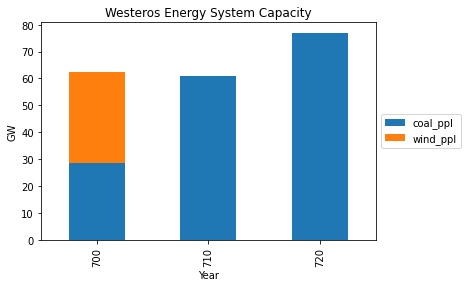

In [19]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

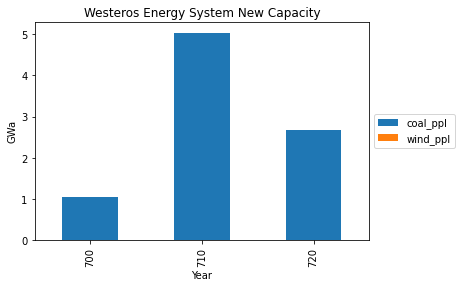

In [20]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

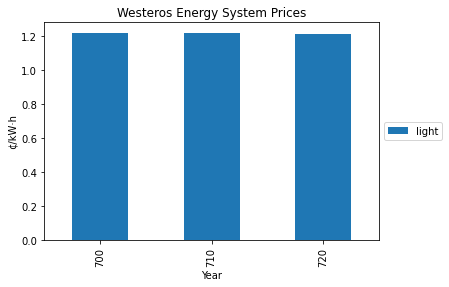

In [21]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

## Reason to Have Different Results
Based on the parameters I used for `LED`, the results differ from the baseline scenario results. This is because lifetime of the `LED` is 50 times of `bulb`, and `LED`is 50% more efficient than the `bulb` but the investment cost of `LED` is ~17 times of `bulb`. Here I needed to try different parameters to find a parameter set which results same as the baseline scenario.

## Searching for the appropiate parameters to get desired results
Below I ran the scenario using a predefined parameter space until getting the same results as baseline scenario.

In [22]:
lifetime_space = [50, 30, 15, 10, 5, 3]
inv_cost_space = [83.35, 150, 200, 250, 300]
eff_space = [1.5, 1.4, 1.3, 1.2, 1.1]

import itertools
parameter_space = itertools.product(lifetime_space, inv_cost_space, eff_space)

for lifetime, inv_cost, eff in parameter_space:
    scen.remove_solution()
    scen.check_out()

    df = make_df(
        "technical_lifetime",
        node_loc=country,
        year_vtg=model_horizon,
        unit="y",
        technology="LED",
        value=lifetime,
    )
    scen.add_par("technical_lifetime", df)

    df = make_df(
        "inv_cost",
        node_loc=country,
        year_vtg=model_horizon,
        unit="USD/kW",
        technology="LED",
        value=inv_cost,# in $ / kW (specific investment cost)
    )
    scen.add_par("inv_cost", df)

    LED_out = base_output.assign(
        technology="LED", commodity="light", level="useful", value=eff
    )
    scen.add_par("output", LED_out)

    scen.commit(comment="searching for appropiate parameters")
    scen.set_as_default()
    scen.solve()

    if scen.var("OBJ")["lvl"] == 173795.09375:
        print("Appropiate parameters are found!")
        break

Appropiate parameters are found!


In [23]:
print(f"lifetime:{lifetime} \ninv_cost:{inv_cost} \neff:{eff}")

lifetime:5 
inv_cost:300 
eff:1.1


Based on the search on the parameter space the new lifetime becomes 5 years, investment cost becomes 300 $/kW, and the efficiency becomes 1.1.

## Plotting the Results

In [24]:
rep = Reporter.from_scenario(scen)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

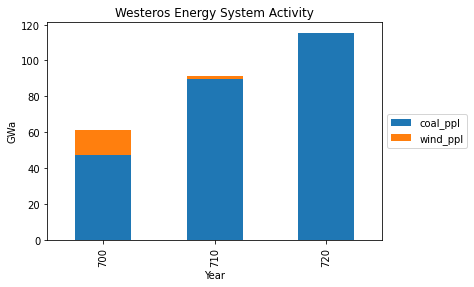

In [25]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

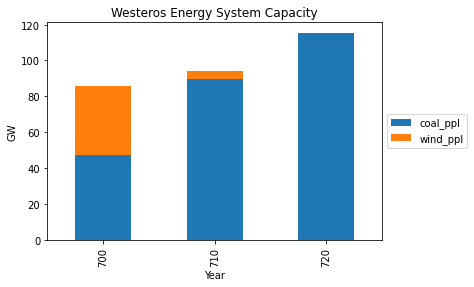

In [26]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

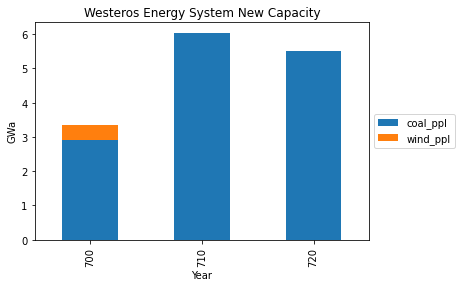

In [27]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

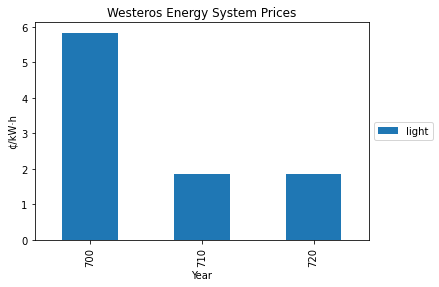

In [28]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

# 2. Investigate under which carbon price the LED technology becomes economically viable

In [29]:
mp.scenario_list()

,model,scenario,scheme,is_default,is_locked,cre_user,cre_date,upd_user,upd_date,lock_user,lock_date,annotation,version
0,Westeros Electrified,baseline,MESSAGE,1,0,koek,2022-06-11 18:10:47.573000,koek,2022-06-11 18:12:47.287000,None,None,basic model of Westeros electrification,2
1,Westeros Electrified,carbon_bound_by_year,MESSAGE,1,0,koek,2022-06-12 16:19:53.392000,koek,2022-06-12 16:19:55.681000,None,None,clone Scenario from 'Westeros Electrified|base...,1
2,Westeros Electrified,carbon_tax,MESSAGE,1,0,koek,2022-06-12 16:19:55.951000,koek,2022-06-12 16:19:57.714000,None,None,clone Scenario from 'Westeros Electrified|base...,1
3,Westeros Electrified,emission_bound,MESSAGE,1,0,koek,2022-06-11 21:02:27.995000,koek,2022-06-11 21:02:29.601000,None,None,clone Scenario from 'Westeros Electrified|base...,2
4,Westeros Electrified,westeros_baseline_LED,MESSAGE,1,0,koek,2022-06-12 19:52:41.733000,koek,2022-06-12 19:54:29.246000,None,None,clone Scenario from 'Westeros Electrified|base...,30
5,Westeros Electrified,westeros_baseline_LED_carbonprice,MESSAGE,1,1,koek,2022-06-12 14:51:07.382000,None,None,koek,2022-06-12 14:51:07.804000,clone Scenario from 'Westeros Electrified|west...,1
6,Westeros Electrified,westeros_baseline_LED_search,MESSAGE,1,0,koek,2022-06-12 14:07:15.364000,koek,2022-06-12 14:07:35.675000,None,None,clone Scenario from 'Westeros Electrified|west...,3


## Cloning the Scenario with `LED` Technology

In [30]:
model = "Westeros Electrified"

base = message_ix.Scenario(mp, model=model, scenario="westeros_baseline_LED")
scen_carbon = base.clone(
    model,
    "westeros_baseline_LED_carbonprice",
    "adding carbon price",
    keep_solution=False,
)
scen_carbon.check_out()

## Introducing Emissions

In [31]:
# First we introduce the emission of CO2 and the emission category GHG
scen_carbon.add_set("emission", "CO2")
scen_carbon.add_cat("emission", "GHG", "CO2")

# Then we add new units to the model library (needed only once)
mp.add_unit("tCO2/kWa")
mp.add_unit("MtCO2")

# Last we add CO2 emissions to the coal powerplant
emission_factor = make_df(
    "emission_factor",
    node_loc=country,
    year_vtg=vintage_years,
    year_act=act_years,
    mode="standard",
    unit="tCO2/kWa",
    technology="coal_ppl",
    emission="CO2",
    value=7.4,
)
scen_carbon.add_par("emission_factor", emission_factor)

## Introducing an Emission Tax

In [32]:
mp.scenario_list()

,model,scenario,scheme,is_default,is_locked,cre_user,cre_date,upd_user,upd_date,lock_user,lock_date,annotation,version
0,Westeros Electrified,baseline,MESSAGE,1,0,koek,2022-06-11 18:10:47.573000,koek,2022-06-11 18:12:47.287000,None,None,basic model of Westeros electrification,2
1,Westeros Electrified,carbon_bound_by_year,MESSAGE,1,0,koek,2022-06-12 16:19:53.392000,koek,2022-06-12 16:19:55.681000,None,None,clone Scenario from 'Westeros Electrified|base...,1
2,Westeros Electrified,carbon_tax,MESSAGE,1,0,koek,2022-06-12 16:19:55.951000,koek,2022-06-12 16:19:57.714000,None,None,clone Scenario from 'Westeros Electrified|base...,1
3,Westeros Electrified,emission_bound,MESSAGE,1,0,koek,2022-06-11 21:02:27.995000,koek,2022-06-11 21:02:29.601000,None,None,clone Scenario from 'Westeros Electrified|base...,2
4,Westeros Electrified,westeros_baseline_LED,MESSAGE,1,0,koek,2022-06-12 19:52:41.733000,koek,2022-06-12 19:54:29.246000,None,None,clone Scenario from 'Westeros Electrified|base...,30
5,Westeros Electrified,westeros_baseline_LED_carbonprice,MESSAGE,1,1,koek,2022-06-12 14:51:07.382000,None,None,koek,2022-06-12 14:51:07.804000,clone Scenario from 'Westeros Electrified|west...,1
6,Westeros Electrified,westeros_baseline_LED_search,MESSAGE,1,0,koek,2022-06-12 14:07:15.364000,koek,2022-06-12 14:07:35.675000,None,None,clone Scenario from 'Westeros Electrified|west...,3


### - Check emission price from "emission_bound" scenario

In [33]:
scen_bd = message_ix.Scenario(mp, model=model, scenario="emission_bound")
# Price in USD/tCO2
emission_prices = scen_bd.var("PRICE_EMISSION")
emission_prices

,node,type_emission,type_tec,year,lvl,mrg
0,Westeros,GHG,all,700,11.571898,0.0
1,Westeros,GHG,all,710,18.849403,0.0
2,Westeros,GHG,all,720,30.703691,0.0


### - Check emission price from "carbon_bound_by_year" scenario

In [34]:
scen_bd_year = message_ix.Scenario(mp, model=model, scenario="carbon_bound_by_year")
# Price in USD/tCO2
emission_prices_yr = scen_bd_year.var("PRICE_EMISSION")
emission_prices_yr

,node,type_emission,type_tec,year,lvl,mrg
0,Westeros,GHG,all,720,42.541293,0.0


### - Set the carbon tax equal to the emission price from cumulative bound scenario and solve

In [35]:
scen_carbon.add_set("type_year", [700, 710, 720])

# In case you need to add the new unit to the platform
mp.add_unit("USD/tCO2")

tax_emission = make_df(
    "tax_emission",
    node="Westeros",
    type_year=[700, 710, 720],
    type_tec="all",
    unit="USD/tCO2",
    type_emission="GHG",
    value=emission_prices.set_index("year").lvl,
)
scen_carbon.add_par("tax_emission", tax_emission)
scen_carbon.par("tax_emission")

,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,11.571898,USD/tCO2
1,Westeros,GHG,all,710,18.849403,USD/tCO2
2,Westeros,GHG,all,720,30.703691,USD/tCO2


In [36]:
scen_carbon.commit(comment="setting taxes on emissions")

In [37]:
scen_carbon.solve()

In [38]:
scen_carbon.var("EMISS", {"node": "Westeros"})

,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,350.569757,0.0
1,Westeros,CO2,all,710,425.562957,0.0
2,Westeros,CO2,all,720,210.153017,0.0


In [39]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

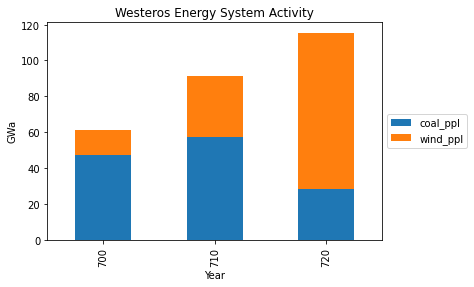

In [40]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

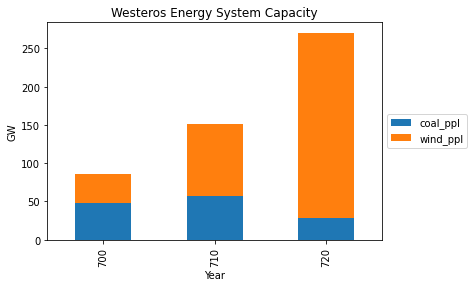

In [41]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

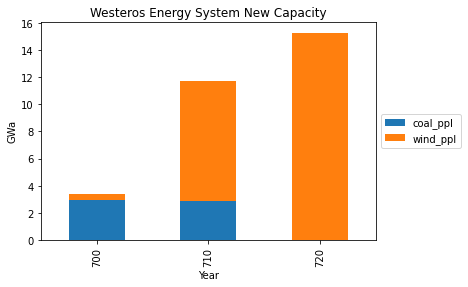

In [42]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

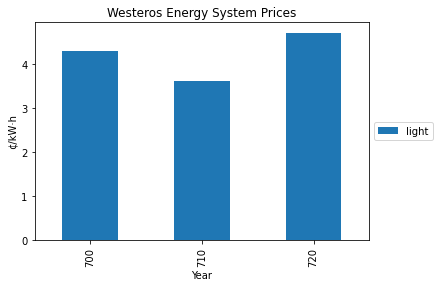

In [43]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

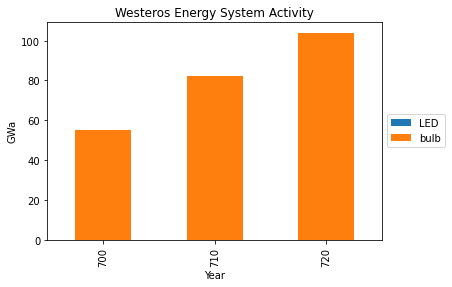

In [44]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

When I set the carbon tax equal to the emission price of cumulative bound scenario, LED technology is not used at all.

### - Set the carbon tax equal to the emission price from yearly bound scenario and solve

In [45]:
scen_carbon.remove_solution()
scen_carbon.check_out()

scen_carbon.add_set("type_year", [700, 710, 720])

tax_emission = make_df(
    "tax_emission",
    node="Westeros",
    type_year=[700, 710, 720],
    type_tec="all",
    unit="USD/tCO2",
    type_emission="GHG",
    value=pd.DataFrame(index= [700, 710, 720], data=[emission_prices_yr.set_index("year").lvl.loc[720]]*3).rename(columns={0:"lvl"}).lvl,
)
scen_carbon.add_par("tax_emission", tax_emission)
scen_carbon.par("tax_emission")

,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,42.541293,USD/tCO2
1,Westeros,GHG,all,710,42.541293,USD/tCO2
2,Westeros,GHG,all,720,42.541293,USD/tCO2


In [46]:
pd.DataFrame(index= [700, 710, 720], data=[emission_prices_yr.set_index("year").lvl.loc[720]]*3).rename(columns={0:"lvl"}).lvl

700    42.541293
710    42.541293
720    42.541293
Name: lvl, dtype: float64

In [47]:
scen_carbon.commit(comment="setting taxes on emissions")

In [48]:
scen_carbon.solve()

In [49]:
scen_carbon.var("EMISS", {"node": "Westeros"})

,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,218.509051,0.0
1,Westeros,CO2,all,710,68.030446,0.0
2,Westeros,CO2,all,720,0.000000,0.0


In [50]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

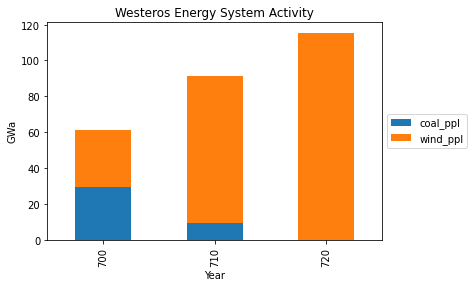

In [51]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

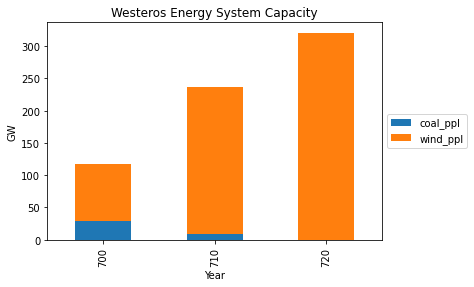

In [52]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

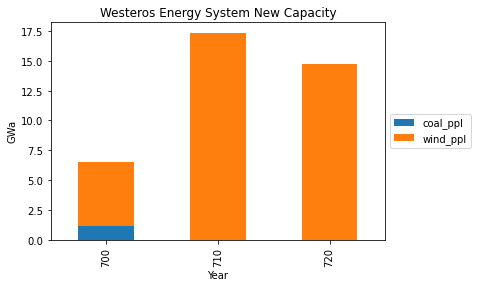

In [53]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

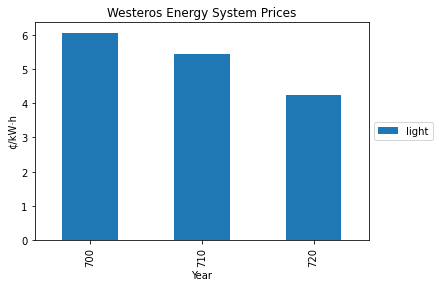

In [54]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

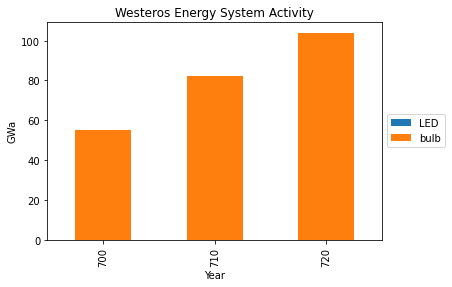

In [55]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

When I set the carbon tax equal to the emission price of yearly bound scenario, LED technology is still not used at all. Therefore, I will try to set much higher carbon tax.

## Try higher carbon price

In [56]:
scen_carbon.remove_solution()
scen_carbon.check_out()

scen_carbon.add_set("type_year", [700, 710, 720])

tax_emission = make_df(
    "tax_emission",
    node="Westeros",
    type_year=[700, 710, 720],
    type_tec="all",
    unit="USD/tCO2",
    type_emission="GHG",
    value=pd.DataFrame(index= [700, 710, 720], data=[50]*3).rename(columns={0:"lvl"}).lvl,
)
scen_carbon.add_par("tax_emission", tax_emission)
scen_carbon.par("tax_emission")

,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,50.0,USD/tCO2
1,Westeros,GHG,all,710,50.0,USD/tCO2
2,Westeros,GHG,all,720,50.0,USD/tCO2


In [57]:
scen_carbon.commit(comment="setting taxes on emissions")

In [58]:
scen_carbon.solve()

In [59]:
scen_carbon.var("EMISS", {"node": "Westeros"})

,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,177.397940,0.0
1,Westeros,CO2,all,710,42.238122,0.0
2,Westeros,CO2,all,720,0.000000,0.0


In [60]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

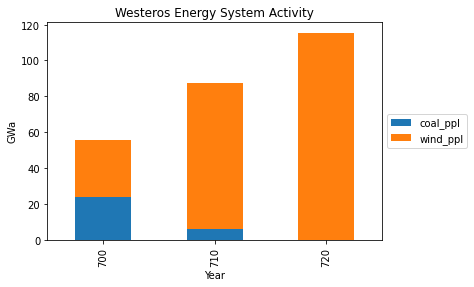

In [61]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

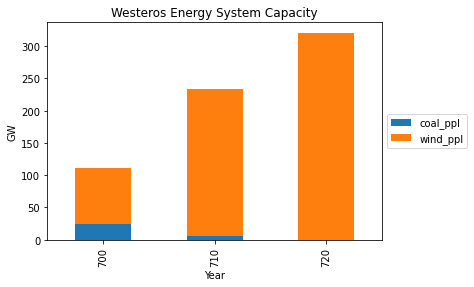

In [62]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

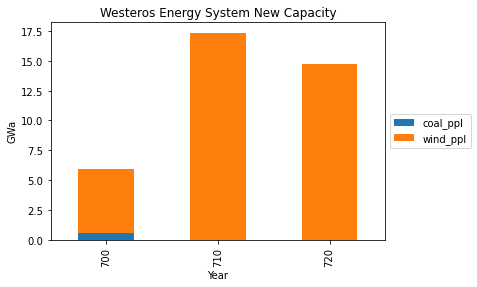

In [63]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

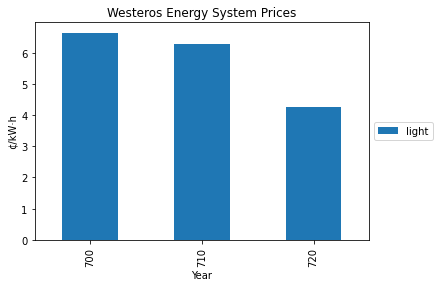

In [64]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

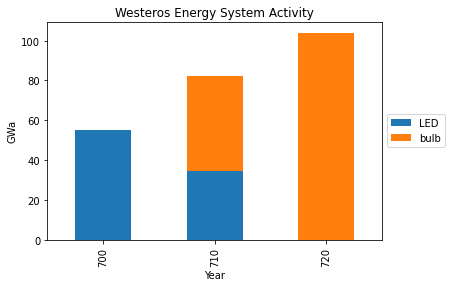

In [65]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

When I set the carbon price to 50 USD/tCO2, LED becomes economically viable in years 700 and 710. Problem with the year 720 is, coal is completely phased out. Therefore, carbon price no longer has an effect on which technology to use (LED or bulb). Only thing we can do is increasing the carbon price and making the LED only economically feasible technology.

# 3. Assume different maximum diffusion rates for this new technology and compare the share of electricity from coal and wind depending on the diffusion rates

## Add initial growth rate for LED
Here we define the initial value for LED growth to become a base for diffusion calculations. Otherwise it wil be zero, and there won't be any LED installation.

In [118]:
scen_carbon.remove_solution()
scen_carbon.check_out()

# Define an initial value of 0.1
df = make_df(
        "initial_activity_up",
        node_loc=country,
        year_act=model_horizon,
        time="year",
        unit="-",
        technology="LED",
        value=0.1,
    )
scen_carbon.add_par("initial_activity_up", df)

## Start with a diffusion rate of 0.1

In [119]:
df = make_df(
        "growth_activity_up",
        node_loc=country,
        year_act=model_horizon,
        time="year",
        unit="-",
        technology="LED",
        value=0.1,
    )
scen_carbon.add_par("growth_activity_up", df)

In [120]:
scen_carbon.commit(comment="adding diffusion rate of 0.1 to LED")

In [121]:
scen_carbon.solve()

In [122]:
scen_carbon.var("OBJ")["lvl"]

440586.4375

In [126]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

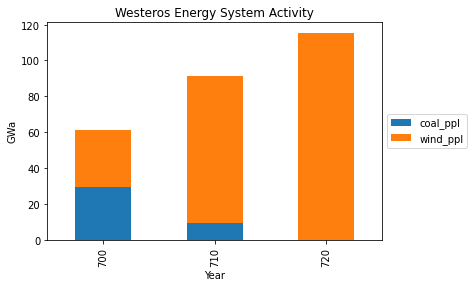

In [130]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

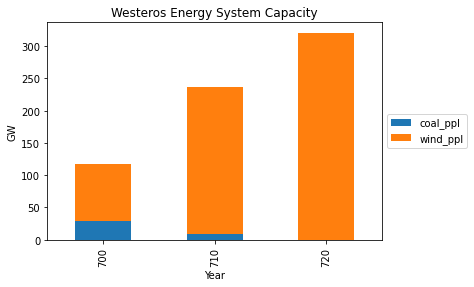

In [131]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

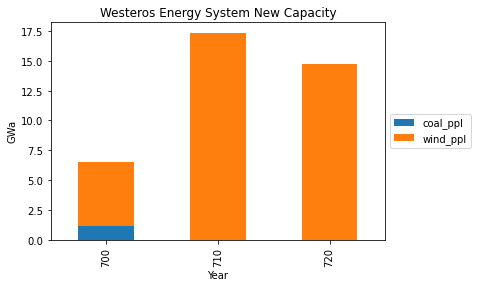

In [132]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

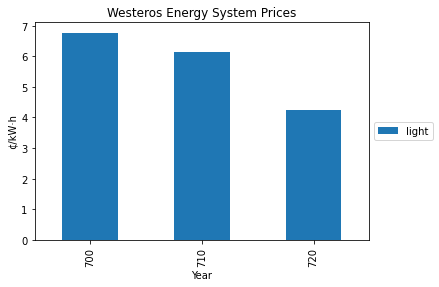

In [133]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

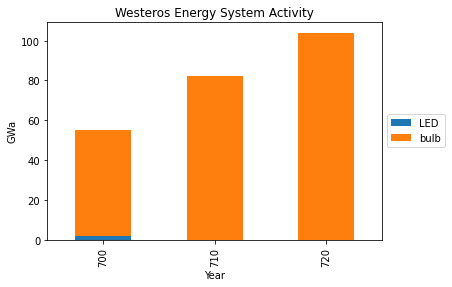

In [134]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

## Try a diffusion rate of 0.5

In [135]:
scen_carbon.remove_solution()
scen_carbon.check_out()

df = make_df(
        "growth_activity_up",
        node_loc=country,
        year_act=model_horizon,
        time="year",
        unit="-",
        technology="LED",
        value=0.5,
    )
scen_carbon.add_par("growth_activity_up", df)

In [136]:
scen_carbon.commit(comment="adding diffusion rate of 0.5 to LED")

In [137]:
scen_carbon.solve()

In [138]:
scen_carbon.var("OBJ")["lvl"]

440256.375

In [139]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

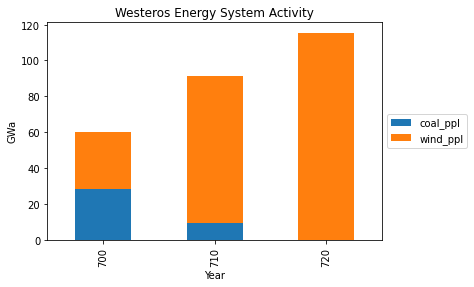

In [140]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

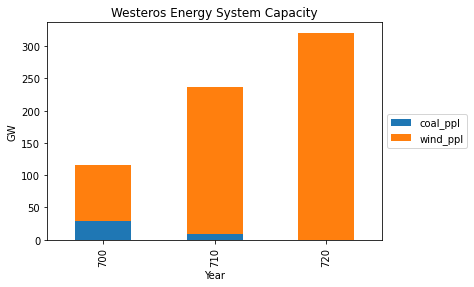

In [141]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

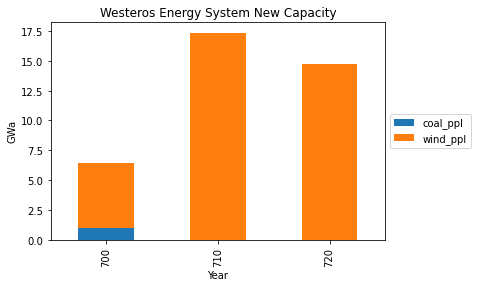

In [142]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

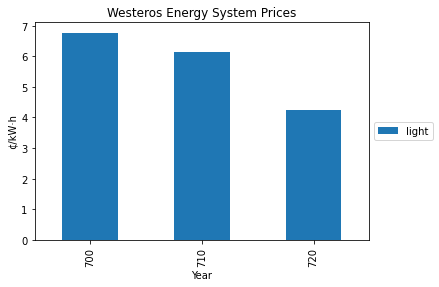

In [143]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

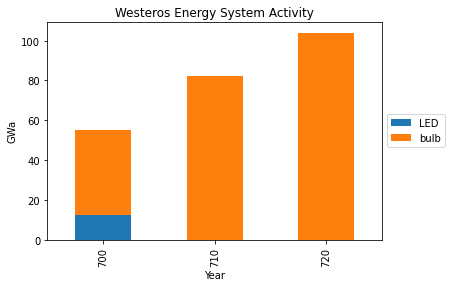

In [144]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

## Try a diffusion rate of 0.9

In [145]:
scen_carbon.remove_solution()
scen_carbon.check_out()

df = make_df(
        "growth_activity_up",
        node_loc=country,
        year_act=model_horizon,
        time="year",
        unit="-",
        technology="LED",
        value=0.9,
    )
scen_carbon.add_par("growth_activity_up", df)

In [146]:
scen_carbon.commit(comment="adding diffusion rate of 0.9 to LED")

In [147]:
scen_carbon.solve()

In [148]:
scen_carbon.var("OBJ")["lvl"]

439119.46875

In [149]:
rep = Reporter.from_scenario(scen_carbon)
prepare_plots(rep)

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

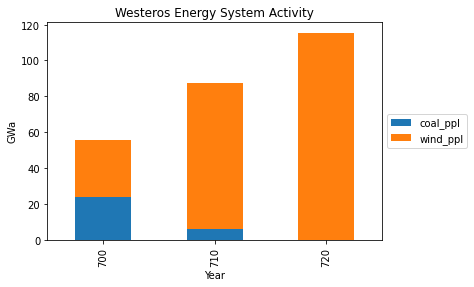

In [150]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

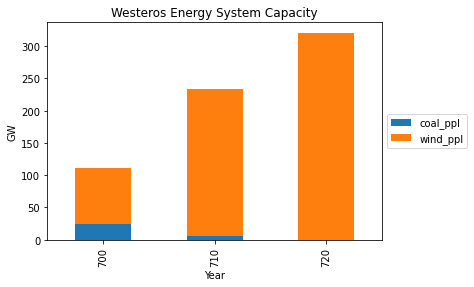

In [151]:
rep.get("plot capacity")

<AxesSubplot:title={'center':'Westeros Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

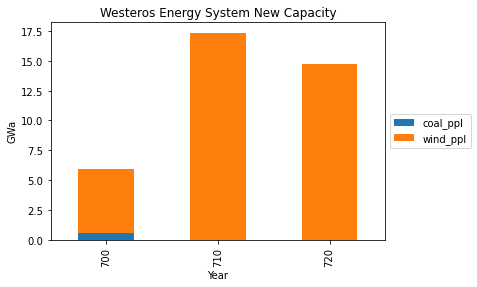

In [152]:
# Create another plot. The same filters are still active.
rep.get("plot new capacity")

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

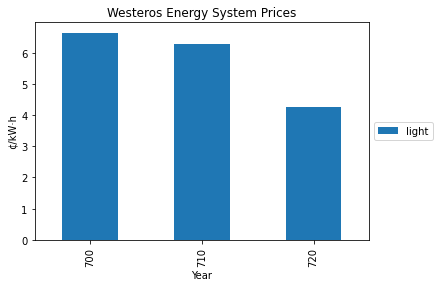

In [153]:
# Replace the technology filters with a commodity filter;
# show only "light" and not e.g. "electricity".
rep.set_filters(c=["light"])

# Create a price plot
rep.get("plot prices")

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

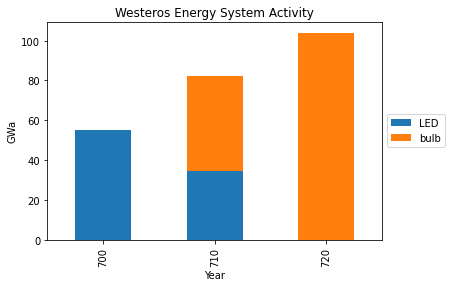

In [154]:
rep.set_filters(t=["bulb", "LED"])
rep.get("plot activity")

When we started with a diffusion rate of 0.1, LED technology enters to the system very slowly. As the diffisuon rate increases, LED's share keeps growing. But there is not a visible change between the shares of coal and wind power plants. Because the amount of energy electricity that needs to be produced by them does not change significantly. For the year 720 there is absolutely no change as it is already an decarbonized system with wind power plant only.

# Conclusion
- For the LED technology to enter into the systems it's efficiency and investment cost play a significant role when there is no carbon price.
- Without a carbon price, LED is economically infeasible.
- For LED to be ecenomically feasible, there is a specific range of carbon price.
- Inside thes range, as the carbon price increases, LED first takes all the place in 700. Then it starts to take place in 710.
- When this specific range is reached/exceeded, LED takes all the place in years 700 and 710.
- After this point, LED becomes econimically enfeasible. Because in 720 there is only wind power plant and carbon price has no effect and the results.
- For LED to become economically feasible in 720, whether it's efficiency must go up, lifetime become longer or investment cost be lower.